In [1]:
import os
import sys
from matplotlib import rcParams
import matplotlib.pyplot as plt

current_notebook = os.path.realpath('__file__')
current_directory = os.path.dirname(current_notebook)

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(project_directory)

## Inputs


In [2]:
# Imports for external costs calculation
from calculation.external_costs.air_pollution import AirPollutionCalculator
from calculation.external_costs.climate_change import ClimateChangeCalculator
from calculation.external_costs.land_use import LandUseCalculator
from calculation.external_costs.collisions import CollisionsCalculator
from calculation.external_costs.barrier_effects import BarrierEffectsCalculator
from calculation.external_costs.upstream_processes import UpstreamProcessesCalculator
from calculation.external_costs.service_failure import ServiceFailureCalculator
from calculation.external_costs.health_benefits import HealthBenefitsCalculator
from calculation.external_costs_calculator import ExternalCostsCalculator

# Imports for input in external costs calculation
from input.external_costs.input_air_pollution import InputAirPollution
from input.external_costs.input_climate_change import InputClimateChange
from input.external_costs.input_land_use import InputLandUse
from input.external_costs.input_collisions import InputCollisions
from input.external_costs.input_barrier_effects import InputBarrierEffects
from input.external_costs.input_upstream_processes import InputUpstreamProcesses
from input.external_costs.input_service_failure import InputServiceFailure
from input.external_costs.input_health_benefits import InputHealthBenefits

# Imports for result printer
from utils.result_printer import (
    PrintExternalCostsPrivateBicycle,
    PrintExternalCostsSharedBicycle,
    PrintExternalCostsPrivatePedelec,
    PrintExternalCostsSharedPedelec,
)

# Imports for plot generators
from plots.external_costs_plot_generator import (
    generate_external_costs_plot,
    generate_external_costs_with_health_benefits_plot,
    generate_external_costs_without_collisions_plot,
    generate_air_pollution_costs_plot,
    generate_climate_change_costs_plot,
    generate_land_use_costs_plot_standard,
    generate_collisions_costs_plot,
    generate_barrier_effects_costs_plot,
    generate_upstream_processes_costs_plot,
    generate_service_failure_costs_plot,
    generate_health_benefits_costs_plot,
    generate_combined_external_costs_plot#,
    # generate_all_modes_external_costs_plot
)


# Import for scenario plot generator
from plots.scenario_analysis.bicycle_infrastructure_scenario import (
    generate_bicycle_infrastructure_collisions_costs_plot
)

Results for mode shared_bicycle:
Cost per vkm: 0.4639268493
Cost per pkm: 0.4639268493
Cost per year: 6903.19470034924


## External Costs Calculation

### Bicycle

In [3]:
# Function to instantiate and append calculators
def add_calculators(external_costs_calculator, *calculators):
    for calc in calculators:
        external_costs_calculator.append(calc)

if __name__ == "__main__":    

    # Instantiate ExternalCostsCalculator for method 1% time preference and private bicycle
    external_costs_1_time_pref_private_bicycle = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for method 1% time preference and shared bicycle
    external_costs_1_time_pref_shared_bicycle = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for method 1% time preference and all bicycle and damage potential method --> scenario analysis
    external_costs_1_time_pref_all_bicycle = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for method 0% time preference and private bicycle 
    external_costs_0_time_pref_private_bicycle = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for method 0% time preference and shared bicycle
    external_costs_0_time_pref_shared_bicycle = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for accidents method causer and private bicycle
    external_costs_causer_private_bicycle = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for accidents method causer and shared bicycle
    external_costs_causer_shared_bicycle = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for accidents method causer and all bicycle --> scenario analysis
    external_costs_causer_all_bicycle = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for collisions scenario with method damage potential
    external_costs_damage_potential_all_bicycle_infrastructure = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for collisions scenario with method causer
    external_costs_causer_all_bicycle_infrastructure = ExternalCostsCalculator()

    # Instantiate the calculators 
    air_pollution_calculator_private_bicycle = AirPollutionCalculator(mode='private_bicycle')
    air_pollution_calculator_shared_bicycle = AirPollutionCalculator(mode='shared_bicycle')

    climate_change_1_time_pref_calculator_private_bicycle = ClimateChangeCalculator(mode='private_bicycle', method='1_time_pref')
    climate_change_0_time_pref_calculator_private_bicycle = ClimateChangeCalculator(mode='private_bicycle', method='0_time_pref')
    climate_change_1_time_pref_calculator_shared_bicycle = ClimateChangeCalculator(mode='shared_bicycle', method='1_time_pref')
    climate_change_0_time_pref_calculator_shared_bicycle = ClimateChangeCalculator(mode='shared_bicycle', method='0_time_pref')

    land_use_calculator_private_bicycle = LandUseCalculator(mode='private_bicycle')
    land_use_calculator_shared_bicycle = LandUseCalculator(mode='shared_bicycle')

    collisions_damage_potential_calculator_private_bicycle = CollisionsCalculator(mode='private_bicycle', method='damage_potential')
    collisions_causer_calculator_private_bicycle = CollisionsCalculator(mode='private_bicycle', method='causer')

    collisions_damage_potential_calculator_shared_bicycle = CollisionsCalculator(mode='shared_bicycle', method='damage_potential')
    collisions_causer_calculator_shared_bicycle = CollisionsCalculator(mode='shared_bicycle', method='causer')

    # Scenario analysis
    collisions_damage_potential_calculator_all_bicycle = CollisionsCalculator(mode='all_bicycle', method='damage_potential')
    collisions_causer_calculator_all_bicycle = CollisionsCalculator(mode='all_bicycle', method='causer')
    collisions_damage_potential_calculator_all_bicycle_infrastructure = CollisionsCalculator(mode='all_bicycle', method='damage_potential_infrastructure')
    collisions_causer_calculator_all_bicycle_infrastructure = CollisionsCalculator(mode='all_bicycle', method='causer_infrastructure')

    barrier_effects_calculator_private_bicycle = BarrierEffectsCalculator(mode='private_bicycle')
    barrier_effects_calculator_shared_bicycle = BarrierEffectsCalculator(mode='shared_bicycle')
    
    upstream_processes_1_time_pref_calculator_private_bicycle = UpstreamProcessesCalculator(mode='private_bicycle', method='1_time_pref')
    upstream_processes_1_time_pref_calculator_shared_bicycle = UpstreamProcessesCalculator(mode='shared_bicycle', method='1_time_pref')
    
    upstream_processes_0_time_pref_calculator_private_bicycle = UpstreamProcessesCalculator(mode='private_bicycle', method='0_time_pref')
    upstream_processes_0_time_pref_calculator_shared_bicycle = UpstreamProcessesCalculator(mode='shared_bicycle', method='0_time_pref')

    service_failure_calculator_private_bicycle = ServiceFailureCalculator(mode='private_bicycle')
    service_failure_calculator_shared_bicycle = ServiceFailureCalculator(mode='shared_bicycle')

    health_benefits_calculator_private_bicycle = HealthBenefitsCalculator(mode='private_bicycle')
    health_benefits_calculator_shared_bicycle = HealthBenefitsCalculator(mode='shared_bicycle')

    # Append the calculators to the ExternalCostsCalculator for method 1% time preference and private bicycle
    add_calculators(external_costs_1_time_pref_private_bicycle, 
                    air_pollution_calculator_private_bicycle,
                    climate_change_1_time_pref_calculator_private_bicycle,
                    land_use_calculator_private_bicycle,
                    collisions_damage_potential_calculator_private_bicycle,
                    barrier_effects_calculator_private_bicycle,
                    upstream_processes_1_time_pref_calculator_private_bicycle,
                    service_failure_calculator_private_bicycle,
                    health_benefits_calculator_private_bicycle)
    
    # Append the calculators to the ExternalCostsCalculator for method 1% time preference and shared bicycle
    add_calculators(external_costs_1_time_pref_shared_bicycle, 
                    air_pollution_calculator_shared_bicycle,
                    climate_change_1_time_pref_calculator_shared_bicycle,
                    land_use_calculator_shared_bicycle,
                    collisions_damage_potential_calculator_shared_bicycle,
                    barrier_effects_calculator_shared_bicycle,
                    upstream_processes_1_time_pref_calculator_shared_bicycle,
                    service_failure_calculator_shared_bicycle,
                    health_benefits_calculator_shared_bicycle)
    
    # Append the calculators to the ExternalCostsCalculator for method 1% time preference and all bicycle --> scenario analysis
    add_calculators(external_costs_1_time_pref_all_bicycle, 
                    air_pollution_calculator_private_bicycle,
                    climate_change_1_time_pref_calculator_private_bicycle,
                    land_use_calculator_private_bicycle,
                    collisions_damage_potential_calculator_all_bicycle,
                    barrier_effects_calculator_private_bicycle,
                    upstream_processes_1_time_pref_calculator_private_bicycle,
                    service_failure_calculator_private_bicycle,
                    health_benefits_calculator_private_bicycle)
    
    # Append the calculators to the ExternalCostsCalculator for method 0% time preference and private bicycle
    add_calculators(external_costs_0_time_pref_private_bicycle, 
                    air_pollution_calculator_private_bicycle,
                    climate_change_0_time_pref_calculator_private_bicycle,
                    land_use_calculator_private_bicycle,
                    collisions_damage_potential_calculator_private_bicycle,
                    barrier_effects_calculator_private_bicycle,
                    upstream_processes_0_time_pref_calculator_private_bicycle,
                    service_failure_calculator_private_bicycle,
                    health_benefits_calculator_private_bicycle)
    
    # Append the calculators to the ExternalCostsCalculator for method 0% time preference and shared bicycle
    add_calculators(external_costs_0_time_pref_shared_bicycle, 
                    air_pollution_calculator_shared_bicycle,
                    climate_change_0_time_pref_calculator_shared_bicycle,
                    land_use_calculator_shared_bicycle,
                    collisions_damage_potential_calculator_shared_bicycle,
                    barrier_effects_calculator_shared_bicycle,
                    upstream_processes_0_time_pref_calculator_shared_bicycle,
                    service_failure_calculator_shared_bicycle,
                    health_benefits_calculator_shared_bicycle)

    # Append the calculators to the ExternalCostsCalculator for accidents method causer and private bicycle
    add_calculators(external_costs_causer_private_bicycle, 
                    air_pollution_calculator_private_bicycle,
                    climate_change_1_time_pref_calculator_private_bicycle,
                    land_use_calculator_private_bicycle,
                    collisions_causer_calculator_private_bicycle,
                    collisions_causer_calculator_all_bicycle,
                    barrier_effects_calculator_private_bicycle,
                    upstream_processes_1_time_pref_calculator_private_bicycle,
                    service_failure_calculator_private_bicycle)
    
    # Append the calculators to the ExternalCostsCalculator for accidents method causer and shared bicycle --> scenario analysis
    add_calculators(external_costs_causer_shared_bicycle, 
                    air_pollution_calculator_shared_bicycle,
                    climate_change_1_time_pref_calculator_shared_bicycle,
                    land_use_calculator_shared_bicycle,
                    collisions_causer_calculator_shared_bicycle,
                    barrier_effects_calculator_shared_bicycle,
                    upstream_processes_1_time_pref_calculator_shared_bicycle,
                    service_failure_calculator_shared_bicycle)
    
    # Append the calculators to the ExternalCostsCalculator for accidents method causer and all bicycle --> scenario analysis
    add_calculators(external_costs_causer_all_bicycle, 
                    air_pollution_calculator_shared_bicycle,
                    climate_change_1_time_pref_calculator_shared_bicycle,
                    land_use_calculator_shared_bicycle,
                    collisions_causer_calculator_all_bicycle,
                    barrier_effects_calculator_shared_bicycle,
                    upstream_processes_1_time_pref_calculator_shared_bicycle,
                    service_failure_calculator_shared_bicycle)


    # Append the calculators to the ExternalCostsCalculator for collisions scenario with method damage potential
    add_calculators(external_costs_damage_potential_all_bicycle_infrastructure, 
                    air_pollution_calculator_private_bicycle,
                    climate_change_1_time_pref_calculator_private_bicycle,
                    land_use_calculator_private_bicycle,
                    collisions_damage_potential_calculator_all_bicycle_infrastructure,
                    barrier_effects_calculator_private_bicycle,
                    upstream_processes_1_time_pref_calculator_private_bicycle,
                    service_failure_calculator_private_bicycle,
                    health_benefits_calculator_private_bicycle)
    

    # Append the calculators to the ExternalCostsCalculator for collisions scenario with method causer and private bicycle
    add_calculators(external_costs_causer_all_bicycle_infrastructure, 
                    air_pollution_calculator_private_bicycle,
                    climate_change_1_time_pref_calculator_private_bicycle,
                    land_use_calculator_private_bicycle,
                    collisions_causer_calculator_all_bicycle_infrastructure,
                    barrier_effects_calculator_private_bicycle,
                    upstream_processes_1_time_pref_calculator_private_bicycle,
                    service_failure_calculator_private_bicycle)


    # Evaluate the calculations and save in results dictionary for method 1% time preference and private bicycle
    external_costs_1_time_pref_private_bicycle.evaluate()
    external_costs_results_1_time_pref_private_bicycle = external_costs_1_time_pref_private_bicycle.results

    # Evaluate the calculations and save in results dictionary for method 1% time preference and shared bicycle
    external_costs_1_time_pref_shared_bicycle.evaluate()
    external_costs_results_1_time_pref_shared_bicycle = external_costs_1_time_pref_shared_bicycle.results

    # Evaluate the calculations and save in results dictionary for method 1% time preference and all bicycle --> scenario analysis
    external_costs_1_time_pref_all_bicycle.evaluate()
    external_costs_results_1_time_pref_all_bicycle = external_costs_1_time_pref_all_bicycle.results


    # Evaluate the calculations and save in results dictionary for method 0% time preference and private bicycle
    external_costs_0_time_pref_private_bicycle.evaluate()
    external_costs_results_0_time_pref_private_bicycle = external_costs_0_time_pref_private_bicycle.results

    # Evaluate the calculations and save in results dictionary for method 0% time preference and shared bicycle
    external_costs_0_time_pref_shared_bicycle.evaluate()
    external_costs_results_0_time_pref_shared_bicycle = external_costs_0_time_pref_shared_bicycle.results


    # Evaluate the calculations and save in results dictionary for causer method and private bicycle
    external_costs_causer_private_bicycle.evaluate()
    external_costs_results_causer_private_bicycle = external_costs_causer_private_bicycle.results

    # Evaluate the calculations and save in results dictionary for causer method and shared bicycle
    external_costs_causer_shared_bicycle.evaluate()
    external_costs_results_causer_shared_bicycle = external_costs_causer_shared_bicycle.results

    # Evaluate the calculations and save in results dictionary for causer method and all bicycle --> scenario analysis
    external_costs_causer_all_bicycle.evaluate()
    external_costs_results_causer_all_bicycle = external_costs_causer_all_bicycle.results


    # Evaluate the calculations and save in results dictionary for damage potential method and all bicycle --> scenario analysis
    external_costs_damage_potential_all_bicycle_infrastructure.evaluate()
    external_costs_results_damage_potential_all_bicycle_infrastructure = external_costs_damage_potential_all_bicycle_infrastructure.results

    # Evaluate the calculations and save in results dictionary for causer method and all bicycle --> scenario analysis
    external_costs_causer_all_bicycle_infrastructure.evaluate()
    external_costs_results_causer_all_bicycle_infrastructure = external_costs_causer_all_bicycle_infrastructure.results


    PrintExternalCostsPrivateBicycle(external_costs_results_1_time_pref_private_bicycle)

    PrintExternalCostsSharedBicycle(external_costs_results_1_time_pref_shared_bicycle)

Results for mode 'all_bicycle' and method 'damage_potential_infrastructure' saved to '\\nas.ads.mwn.de\ge56wuh\03 Code\03_ExternalCostsBikes\python\results\infrastructure_results_all_bicycle_damage_potential_infrastructure.pkl'.
Results for mode 'all_bicycle' and method 'causer_infrastructure' saved to '\\nas.ads.mwn.de\ge56wuh\03 Code\03_ExternalCostsBikes\python\results\infrastructure_results_all_bicycle_causer_infrastructure.pkl'.

#                         EXTERNAL COSTS PRIVATE BICYCLE                          #
CATEGORIES PRIVATE BICYCLE
    Air Pollution
         Air Pollution costs per vkm                               :   0.00 €-ct/vkm
         Air Pollution costs per pkm                               :   0.00 €-ct/pkm
         Air Pollution costs per year                              :   0.00 €/year
    Climate Change 1% time preference
         Climate Change 1% time preference costs per vkm           :   0.00 €-ct/vkm
         Climate Change 1% time preference costs per pkm

### Pedelec


In [4]:
# Function to instantiate and append calculators
def add_calculators(external_costs_calculator, *calculators):
    for calc in calculators:
        external_costs_calculator.append(calc)

if __name__ == "__main__":    

    # Instantiate ExternalCostsCalculator for method 1% time preference and private pedelec
    external_costs_1_time_pref_private_pedelec = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for method 1% time preference and shared pedelec
    external_costs_1_time_pref_shared_pedelec = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for method 1% time preference and all pedelec and damage potential method --> scenario analysis
    external_costs_1_time_pref_all_pedelec = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for method 0% time preference and private pedelec 
    external_costs_0_time_pref_private_pedelec = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for method 0% time preference and shared pedelec
    external_costs_0_time_pref_shared_pedelec = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for accidents method causer and private pedelec
    external_costs_causer_private_pedelec = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for accidents method causer and shared pedelec
    external_costs_causer_shared_pedelec = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for accidents method causer and all pedelec --> scenario analysis
    external_costs_causer_all_pedelec = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for collisions scenario with method damage potential
    external_costs_damage_potential_all_pedelec_infrastructure = ExternalCostsCalculator()

    # Instantiate ExternalCostsCalculator for collisions scenario with method causer
    external_costs_causer_all_pedelec_infrastructure = ExternalCostsCalculator()

    # Instantiate the calculators 
    air_pollution_calculator_private_pedelec = AirPollutionCalculator(mode='private_pedelec')
    air_pollution_calculator_shared_pedelec = AirPollutionCalculator(mode='shared_pedelec')

    climate_change_1_time_pref_calculator_private_pedelec = ClimateChangeCalculator(mode='private_pedelec', method='1_time_pref')
    climate_change_0_time_pref_calculator_private_pedelec = ClimateChangeCalculator(mode='private_pedelec', method='0_time_pref')
    climate_change_1_time_pref_calculator_shared_pedelec = ClimateChangeCalculator(mode='shared_pedelec', method='1_time_pref')
    climate_change_0_time_pref_calculator_shared_pedelec = ClimateChangeCalculator(mode='shared_pedelec', method='0_time_pref')

    land_use_calculator_private_pedelec = LandUseCalculator(mode='private_pedelec')
    land_use_calculator_shared_pedelec = LandUseCalculator(mode='shared_pedelec')

    collisions_damage_potential_calculator_private_pedelec = CollisionsCalculator(mode='private_pedelec', method='damage_potential')
    collisions_causer_calculator_private_pedelec = CollisionsCalculator(mode='private_pedelec', method='causer')

    collisions_damage_potential_calculator_shared_pedelec = CollisionsCalculator(mode='shared_pedelec', method='damage_potential')
    collisions_causer_calculator_shared_pedelec = CollisionsCalculator(mode='shared_pedelec', method='causer')

    # Scenario analysis
    collisions_damage_potential_calculator_all_pedelec = CollisionsCalculator(mode='all_pedelec', method='damage_potential')
    collisions_causer_calculator_all_pedelec = CollisionsCalculator(mode='all_pedelec', method='causer')
    collisions_damage_potential_calculator_all_pedelec_infrastructure = CollisionsCalculator(mode='all_pedelec', method='damage_potential_infrastructure')
    collisions_causer_calculator_all_pedelec_infrastructure = CollisionsCalculator(mode='all_pedelec', method='causer_infrastructure')

    barrier_effects_calculator_private_pedelec = BarrierEffectsCalculator(mode='private_pedelec')
    barrier_effects_calculator_shared_pedelec = BarrierEffectsCalculator(mode='shared_pedelec')
    
    upstream_processes_1_time_pref_calculator_private_pedelec = UpstreamProcessesCalculator(mode='private_pedelec', method='1_time_pref')
    upstream_processes_1_time_pref_calculator_shared_pedelec = UpstreamProcessesCalculator(mode='shared_pedelec', method='1_time_pref')
    
    upstream_processes_0_time_pref_calculator_private_pedelec = UpstreamProcessesCalculator(mode='private_pedelec', method='0_time_pref')
    upstream_processes_0_time_pref_calculator_shared_pedelec = UpstreamProcessesCalculator(mode='shared_pedelec', method='0_time_pref')

    service_failure_calculator_private_pedelec = ServiceFailureCalculator(mode='private_pedelec')
    service_failure_calculator_shared_pedelec = ServiceFailureCalculator(mode='shared_pedelec')

    health_benefits_calculator_private_pedelec = HealthBenefitsCalculator(mode='private_pedelec')
    health_benefits_calculator_shared_pedelec = HealthBenefitsCalculator(mode='shared_pedelec')

    # Append the calculators to the ExternalCostsCalculator for method 1% time preference and private pedelec
    add_calculators(external_costs_1_time_pref_private_pedelec, 
                    air_pollution_calculator_private_pedelec,
                    climate_change_1_time_pref_calculator_private_pedelec,
                    land_use_calculator_private_pedelec,
                    collisions_damage_potential_calculator_private_pedelec,
                    barrier_effects_calculator_private_pedelec,
                    upstream_processes_1_time_pref_calculator_private_pedelec,
                    service_failure_calculator_private_pedelec,
                    health_benefits_calculator_private_pedelec)
    
    # Append the calculators to the ExternalCostsCalculator for method 1% time preference and shared pedelec
    add_calculators(external_costs_1_time_pref_shared_pedelec, 
                    air_pollution_calculator_shared_pedelec,
                    climate_change_1_time_pref_calculator_shared_pedelec,
                    land_use_calculator_shared_pedelec,
                    collisions_damage_potential_calculator_shared_pedelec,
                    barrier_effects_calculator_shared_pedelec,
                    upstream_processes_1_time_pref_calculator_shared_pedelec,
                    service_failure_calculator_shared_pedelec,
                    health_benefits_calculator_shared_pedelec)
    
    # Append the calculators to the ExternalCostsCalculator for method 1% time preference and all pedelec --> scenario analysis
    add_calculators(external_costs_1_time_pref_all_pedelec, 
                    air_pollution_calculator_private_pedelec,
                    climate_change_1_time_pref_calculator_private_pedelec,
                    land_use_calculator_private_pedelec,
                    collisions_damage_potential_calculator_all_pedelec,
                    barrier_effects_calculator_private_pedelec,
                    upstream_processes_1_time_pref_calculator_private_pedelec,
                    service_failure_calculator_private_pedelec,
                    health_benefits_calculator_private_pedelec)
    
    # Append the calculators to the ExternalCostsCalculator for method 0% time preference and private pedelec
    add_calculators(external_costs_0_time_pref_private_pedelec, 
                    air_pollution_calculator_private_pedelec,
                    climate_change_0_time_pref_calculator_private_pedelec,
                    land_use_calculator_private_pedelec,
                    collisions_damage_potential_calculator_private_pedelec,
                    barrier_effects_calculator_private_pedelec,
                    upstream_processes_0_time_pref_calculator_private_pedelec,
                    service_failure_calculator_private_pedelec,
                    health_benefits_calculator_private_pedelec)
    
    # Append the calculators to the ExternalCostsCalculator for method 0% time preference and shared pedelec
    add_calculators(external_costs_0_time_pref_shared_pedelec, 
                    air_pollution_calculator_shared_pedelec,
                    climate_change_0_time_pref_calculator_shared_pedelec,
                    land_use_calculator_shared_pedelec,
                    collisions_damage_potential_calculator_shared_pedelec,
                    barrier_effects_calculator_shared_pedelec,
                    upstream_processes_0_time_pref_calculator_shared_pedelec,
                    service_failure_calculator_shared_pedelec,
                    health_benefits_calculator_shared_pedelec)

    # Append the calculators to the ExternalCostsCalculator for accidents method causer and private pedelec
    add_calculators(external_costs_causer_private_pedelec, 
                    air_pollution_calculator_private_pedelec,
                    climate_change_1_time_pref_calculator_private_pedelec,
                    land_use_calculator_private_pedelec,
                    collisions_causer_calculator_private_pedelec,
                    barrier_effects_calculator_private_pedelec,
                    upstream_processes_1_time_pref_calculator_private_pedelec,
                    service_failure_calculator_private_pedelec)
    
    # Append the calculators to the ExternalCostsCalculator for accidents method causer and shared pedelec --> scenario analysis
    add_calculators(external_costs_causer_shared_pedelec, 
                    air_pollution_calculator_shared_pedelec,
                    climate_change_1_time_pref_calculator_shared_pedelec,
                    land_use_calculator_shared_pedelec,
                    collisions_causer_calculator_shared_pedelec,
                    barrier_effects_calculator_shared_pedelec,
                    upstream_processes_1_time_pref_calculator_shared_pedelec,
                    service_failure_calculator_shared_pedelec)
    
    # Append the calculators to the ExternalCostsCalculator for accidents method causer and all pedelec --> scenario analysis
    add_calculators(external_costs_causer_all_pedelec, 
                    air_pollution_calculator_shared_pedelec,
                    climate_change_1_time_pref_calculator_shared_pedelec,
                    land_use_calculator_shared_pedelec,
                    collisions_causer_calculator_all_pedelec,
                    barrier_effects_calculator_shared_pedelec,
                    upstream_processes_1_time_pref_calculator_shared_pedelec,
                    service_failure_calculator_shared_pedelec)


    # Append the calculators to the ExternalCostsCalculator for collisions scenario with method damage potential
    add_calculators(external_costs_damage_potential_all_pedelec_infrastructure, 
                    air_pollution_calculator_private_pedelec,
                    climate_change_1_time_pref_calculator_private_pedelec,
                    land_use_calculator_private_pedelec,
                    collisions_damage_potential_calculator_all_pedelec_infrastructure,
                    barrier_effects_calculator_private_pedelec,
                    upstream_processes_1_time_pref_calculator_private_pedelec,
                    service_failure_calculator_private_pedelec,
                    health_benefits_calculator_private_pedelec)
    

    # Append the calculators to the ExternalCostsCalculator for collisions scenario with method causer and private pedelec
    add_calculators(external_costs_causer_all_pedelec_infrastructure, 
                    air_pollution_calculator_private_pedelec,
                    climate_change_1_time_pref_calculator_private_pedelec,
                    land_use_calculator_private_pedelec,
                    collisions_causer_calculator_all_pedelec_infrastructure,
                    barrier_effects_calculator_private_pedelec,
                    upstream_processes_1_time_pref_calculator_private_pedelec,
                    service_failure_calculator_private_pedelec)


    # Evaluate the calculations and save in results dictionary for method 1% time preference and private pedelec
    external_costs_1_time_pref_private_pedelec.evaluate()
    external_costs_results_1_time_pref_private_pedelec = external_costs_1_time_pref_private_pedelec.results

    # Evaluate the calculations and save in results dictionary for method 1% time preference and shared pedelec
    external_costs_1_time_pref_shared_pedelec.evaluate()
    external_costs_results_1_time_pref_shared_pedelec = external_costs_1_time_pref_shared_pedelec.results

    # Evaluate the calculations and save in results dictionary for method 1% time preference and all pedelec --> scenario analysis
    external_costs_1_time_pref_all_pedelec.evaluate()
    external_costs_results_1_time_pref_all_pedelec = external_costs_1_time_pref_all_pedelec.results


    # Evaluate the calculations and save in results dictionary for method 0% time preference and private pedelec
    external_costs_0_time_pref_private_pedelec.evaluate()
    external_costs_results_0_time_pref_private_pedelec = external_costs_0_time_pref_private_pedelec.results

    # Evaluate the calculations and save in results dictionary for method 0% time preference and shared pedelec
    external_costs_0_time_pref_shared_pedelec.evaluate()
    external_costs_results_0_time_pref_shared_pedelec = external_costs_0_time_pref_shared_pedelec.results


    # Evaluate the calculations and save in results dictionary for causer method and private pedelec
    external_costs_causer_private_pedelec.evaluate()
    external_costs_results_causer_private_pedelec = external_costs_causer_private_pedelec.results

    # Evaluate the calculations and save in results dictionary for causer method and shared pedelec
    external_costs_causer_shared_pedelec.evaluate()
    external_costs_results_causer_shared_pedelec = external_costs_causer_shared_pedelec.results

    # Evaluate the calculations and save in results dictionary for causer method and all pedelec --> scenario analysis
    external_costs_causer_all_pedelec.evaluate()
    external_costs_results_causer_all_pedelec = external_costs_causer_all_pedelec.results


    # Evaluate the calculations and save in results dictionary for damage potential method and all pedelec --> scenario analysis
    external_costs_damage_potential_all_pedelec_infrastructure.evaluate()
    external_costs_results_damage_potential_all_pedelec_infrastructure = external_costs_damage_potential_all_pedelec_infrastructure.results

    # Evaluate the calculations and save in results dictionary for causer method and all pedelec --> scenario analysis
    external_costs_causer_all_pedelec_infrastructure.evaluate()
    external_costs_results_causer_all_pedelec_infrastructure = external_costs_causer_all_pedelec_infrastructure.results


    PrintExternalCostsPrivatePedelec(external_costs_results_1_time_pref_private_pedelec)

    PrintExternalCostsSharedPedelec(external_costs_results_1_time_pref_shared_pedelec)


Results for mode 'all_pedelec' and method 'damage_potential_infrastructure' saved to '\\nas.ads.mwn.de\ge56wuh\03 Code\03_ExternalCostsBikes\python\results\infrastructure_results_all_pedelec_damage_potential_infrastructure.pkl'.
Results for mode 'all_pedelec' and method 'causer_infrastructure' saved to '\\nas.ads.mwn.de\ge56wuh\03 Code\03_ExternalCostsBikes\python\results\infrastructure_results_all_pedelec_causer_infrastructure.pkl'.

#                         EXTERNAL COSTS PRIVATE PEDELEC                          #
CATEGORIES PRIVATE PEDELEC
    Air Pollution
         Air Pollution costs per vkm                               :   0.03 €-ct/vkm
         Air Pollution costs per pkm                               :   0.03 €-ct/pkm
         Air Pollution costs per year                              : 9013.11 €/year
    Climate Change 1% time preference
         Climate Change 1% time preference costs per vkm           :   0.09 €-ct/vkm
         Climate Change 1% time preference costs per pk

## Postprocessing

### External Costs Plot Generation

#### External Costs of Air Polllution

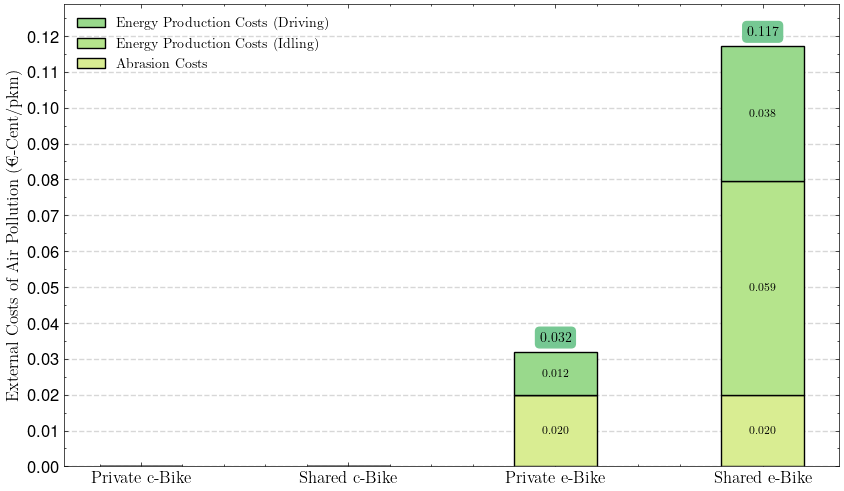

In [5]:
# Bar plot of external costs of air pollution in €-ct/vkm for all modes
generate_air_pollution_costs_plot(
            external_costs_results_1_time_pref_private_bicycle,
            external_costs_results_1_time_pref_shared_bicycle,
            external_costs_results_1_time_pref_private_pedelec,
            external_costs_results_1_time_pref_shared_pedelec)

#### External Costs of Climate Change

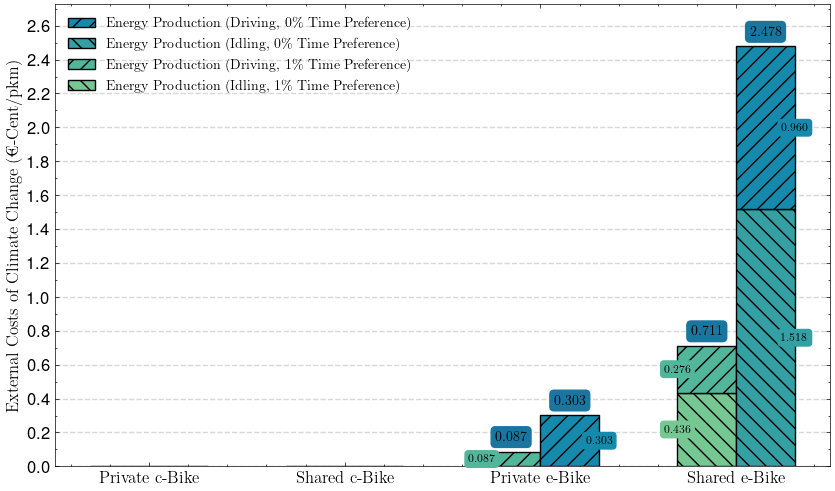

In [6]:
# Bar plot of external costs of climate change in €-ct/vkm for all modes
generate_climate_change_costs_plot(
            external_costs_results_1_time_pref_private_bicycle,
            external_costs_results_0_time_pref_private_bicycle, 
            external_costs_results_1_time_pref_shared_bicycle,
            external_costs_results_0_time_pref_shared_bicycle,
            external_costs_results_1_time_pref_private_pedelec,
            external_costs_results_0_time_pref_private_pedelec,
            external_costs_results_1_time_pref_shared_pedelec,
            external_costs_results_0_time_pref_shared_pedelec)

#### External Costs of Land Use Plot

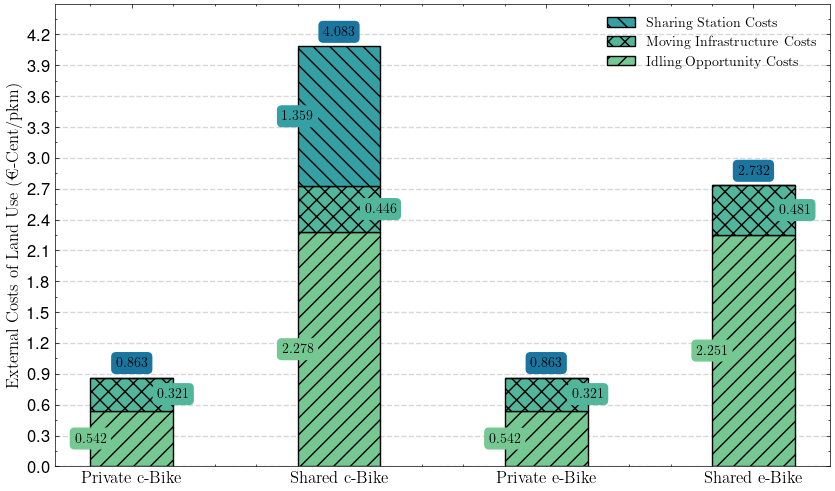

In [7]:
# Bar plot of external costs of land use in €-ct/pkm for all modes
generate_land_use_costs_plot_standard(external_costs_results_1_time_pref_private_bicycle,
                external_costs_results_1_time_pref_shared_bicycle,
                external_costs_results_1_time_pref_private_pedelec,
                external_costs_results_1_time_pref_shared_pedelec)

#### External Costs of Collisions Plot

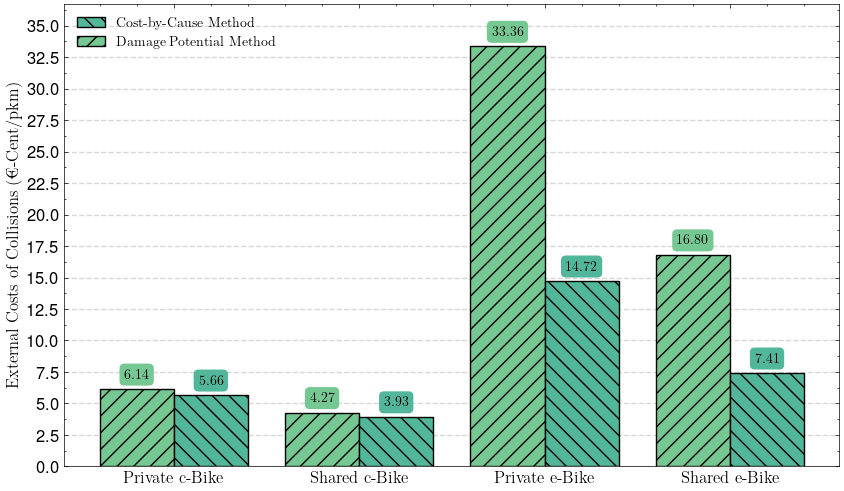

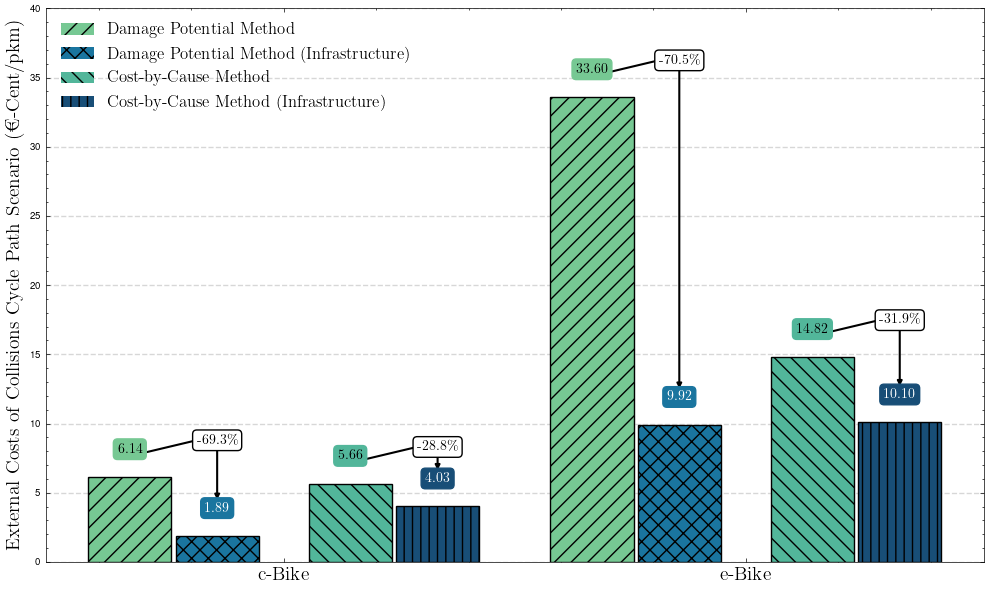

In [8]:
# Bar plot of external costs of collisions in €-ct/vkm for all modes
generate_collisions_costs_plot(external_costs_results_1_time_pref_private_bicycle,
                    external_costs_results_causer_private_bicycle,
                    external_costs_results_1_time_pref_shared_bicycle,
                    external_costs_results_causer_shared_bicycle,
                    external_costs_results_1_time_pref_private_pedelec,
                    external_costs_results_causer_private_pedelec,
                    external_costs_results_1_time_pref_shared_pedelec,
                    external_costs_results_causer_shared_pedelec)

# Bar plot of external costs of collisions in €-ct/vkm for all modes for bicycle infrastructure scenario
generate_bicycle_infrastructure_collisions_costs_plot(
                    external_costs_results_1_time_pref_all_bicycle,
                    external_costs_results_damage_potential_all_bicycle_infrastructure,
                    external_costs_results_causer_all_bicycle,
                    external_costs_results_causer_all_bicycle_infrastructure,
                    external_costs_results_1_time_pref_all_pedelec,
                    external_costs_results_damage_potential_all_pedelec_infrastructure,
                    external_costs_results_causer_all_pedelec,
                    external_costs_results_causer_all_pedelec_infrastructure)

#### External Costs of Barrier Effects Plot

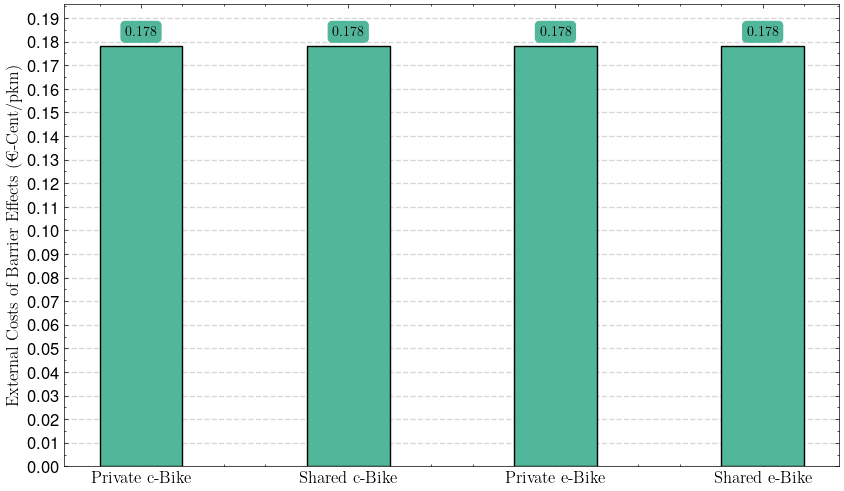

In [9]:
# Bar plot of external costs of barrier effects in €-ct/vkm for all modes
generate_barrier_effects_costs_plot(external_costs_results_1_time_pref_private_bicycle,  
                    external_costs_results_1_time_pref_shared_bicycle,  
                    external_costs_results_1_time_pref_private_pedelec, 
                    external_costs_results_1_time_pref_shared_pedelec)

#### External Costs of Upstream Processes Plot

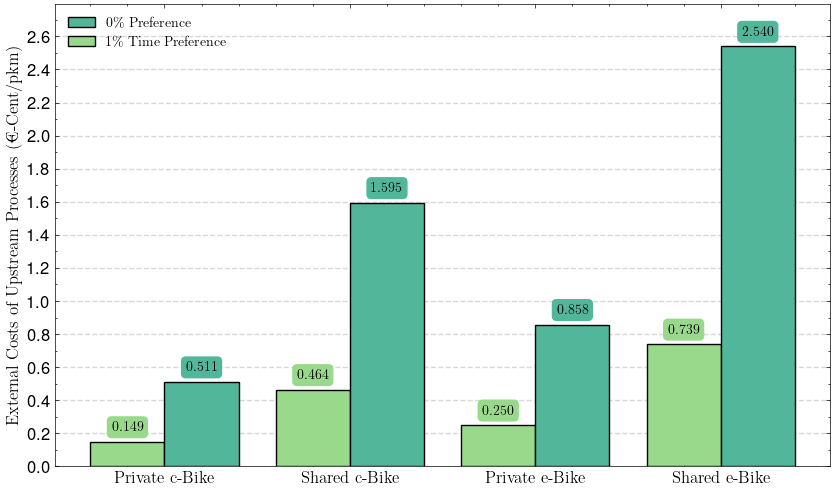

In [10]:
# Bar plot of external costs of upstream processes in €-ct/vkm for all modes
generate_upstream_processes_costs_plot(external_costs_results_1_time_pref_private_bicycle, 
                    external_costs_results_0_time_pref_private_bicycle, 
                    external_costs_results_1_time_pref_shared_bicycle, 
                    external_costs_results_0_time_pref_shared_bicycle, 
                    external_costs_results_1_time_pref_private_pedelec, 
                    external_costs_results_0_time_pref_private_pedelec, 
                    external_costs_results_1_time_pref_shared_pedelec, 
                    external_costs_results_0_time_pref_shared_pedelec)

#### External Costs of Service Failure Plot

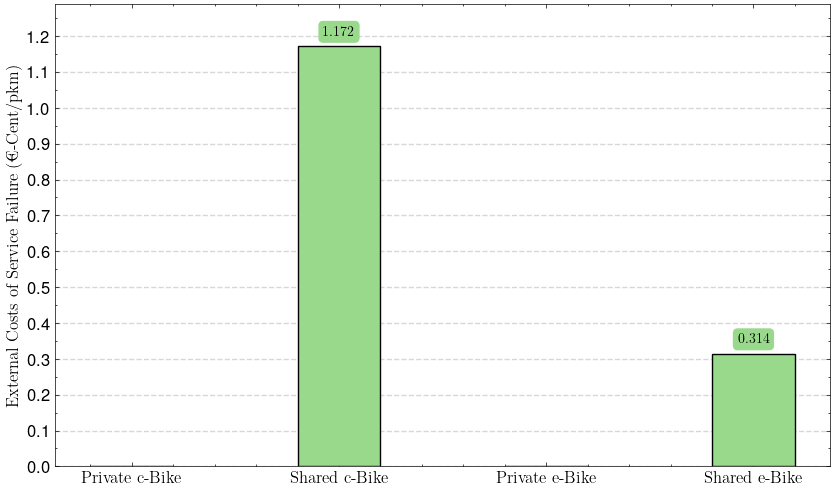

In [11]:
# Bar plot of external costs of service failure in €-ct/vkm for all modes
generate_service_failure_costs_plot(external_costs_results_1_time_pref_private_bicycle,  
                        external_costs_results_1_time_pref_shared_bicycle,  
                        external_costs_results_1_time_pref_private_pedelec, 
                        external_costs_results_1_time_pref_shared_pedelec)

#### External Costs of Health Benefits Plot

In [12]:
# # Bar plot of external costs of health benefits in €-ct/vkm for all modes
# generate_health_benefits_costs_plot(external_costs_results_1_time_pref_private_bicycle,  
#                         external_costs_results_1_time_pref_shared_bicycle,  
#                         external_costs_results_1_time_pref_private_pedelec, 
#                         external_costs_results_1_time_pref_shared_pedelec)

#### Total External Costs Plot

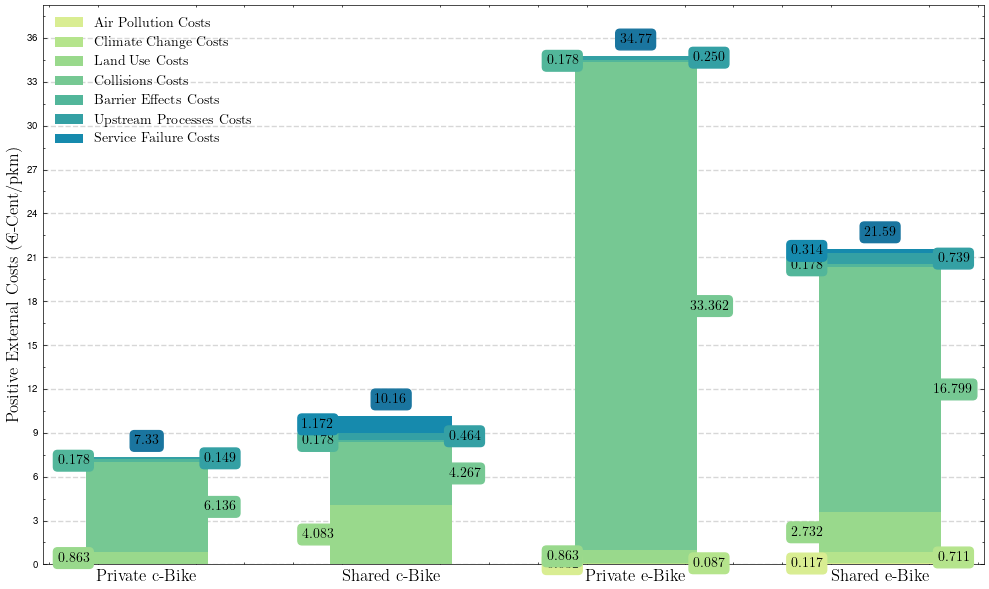

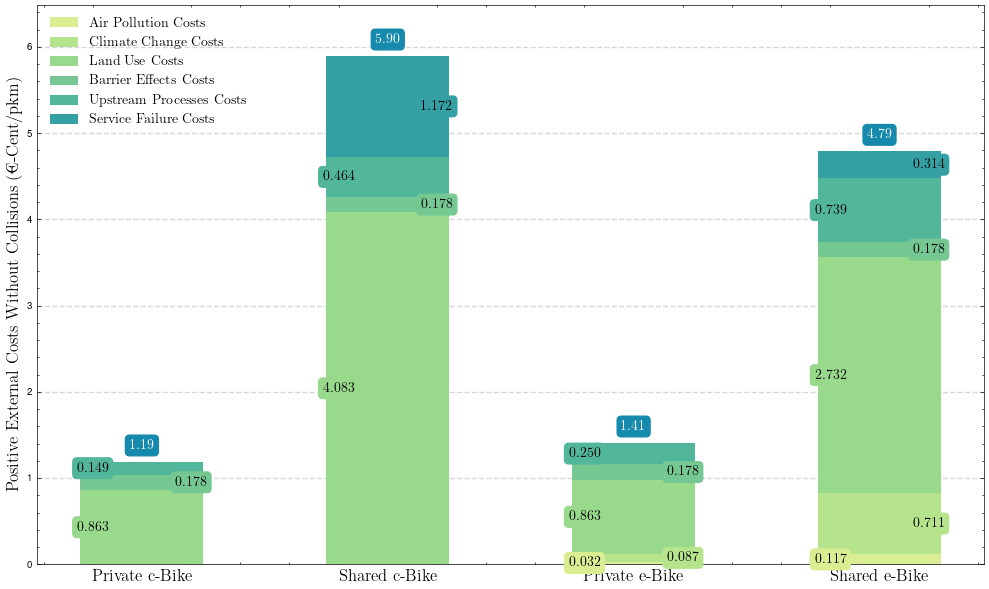

In [13]:
# Bar plot of total external costs in €-ct/vkm for all modes
generate_external_costs_plot(external_costs_results_1_time_pref_private_bicycle,  
                        external_costs_results_1_time_pref_shared_bicycle,  
                        external_costs_results_1_time_pref_private_pedelec, 
                        external_costs_results_1_time_pref_shared_pedelec)

# Bar plot of total external costs without accidents in €-ct/vkm for all modes
generate_external_costs_without_collisions_plot(external_costs_results_1_time_pref_private_bicycle,  
                        external_costs_results_1_time_pref_shared_bicycle,  
                        external_costs_results_1_time_pref_private_pedelec, 
                        external_costs_results_1_time_pref_shared_pedelec)

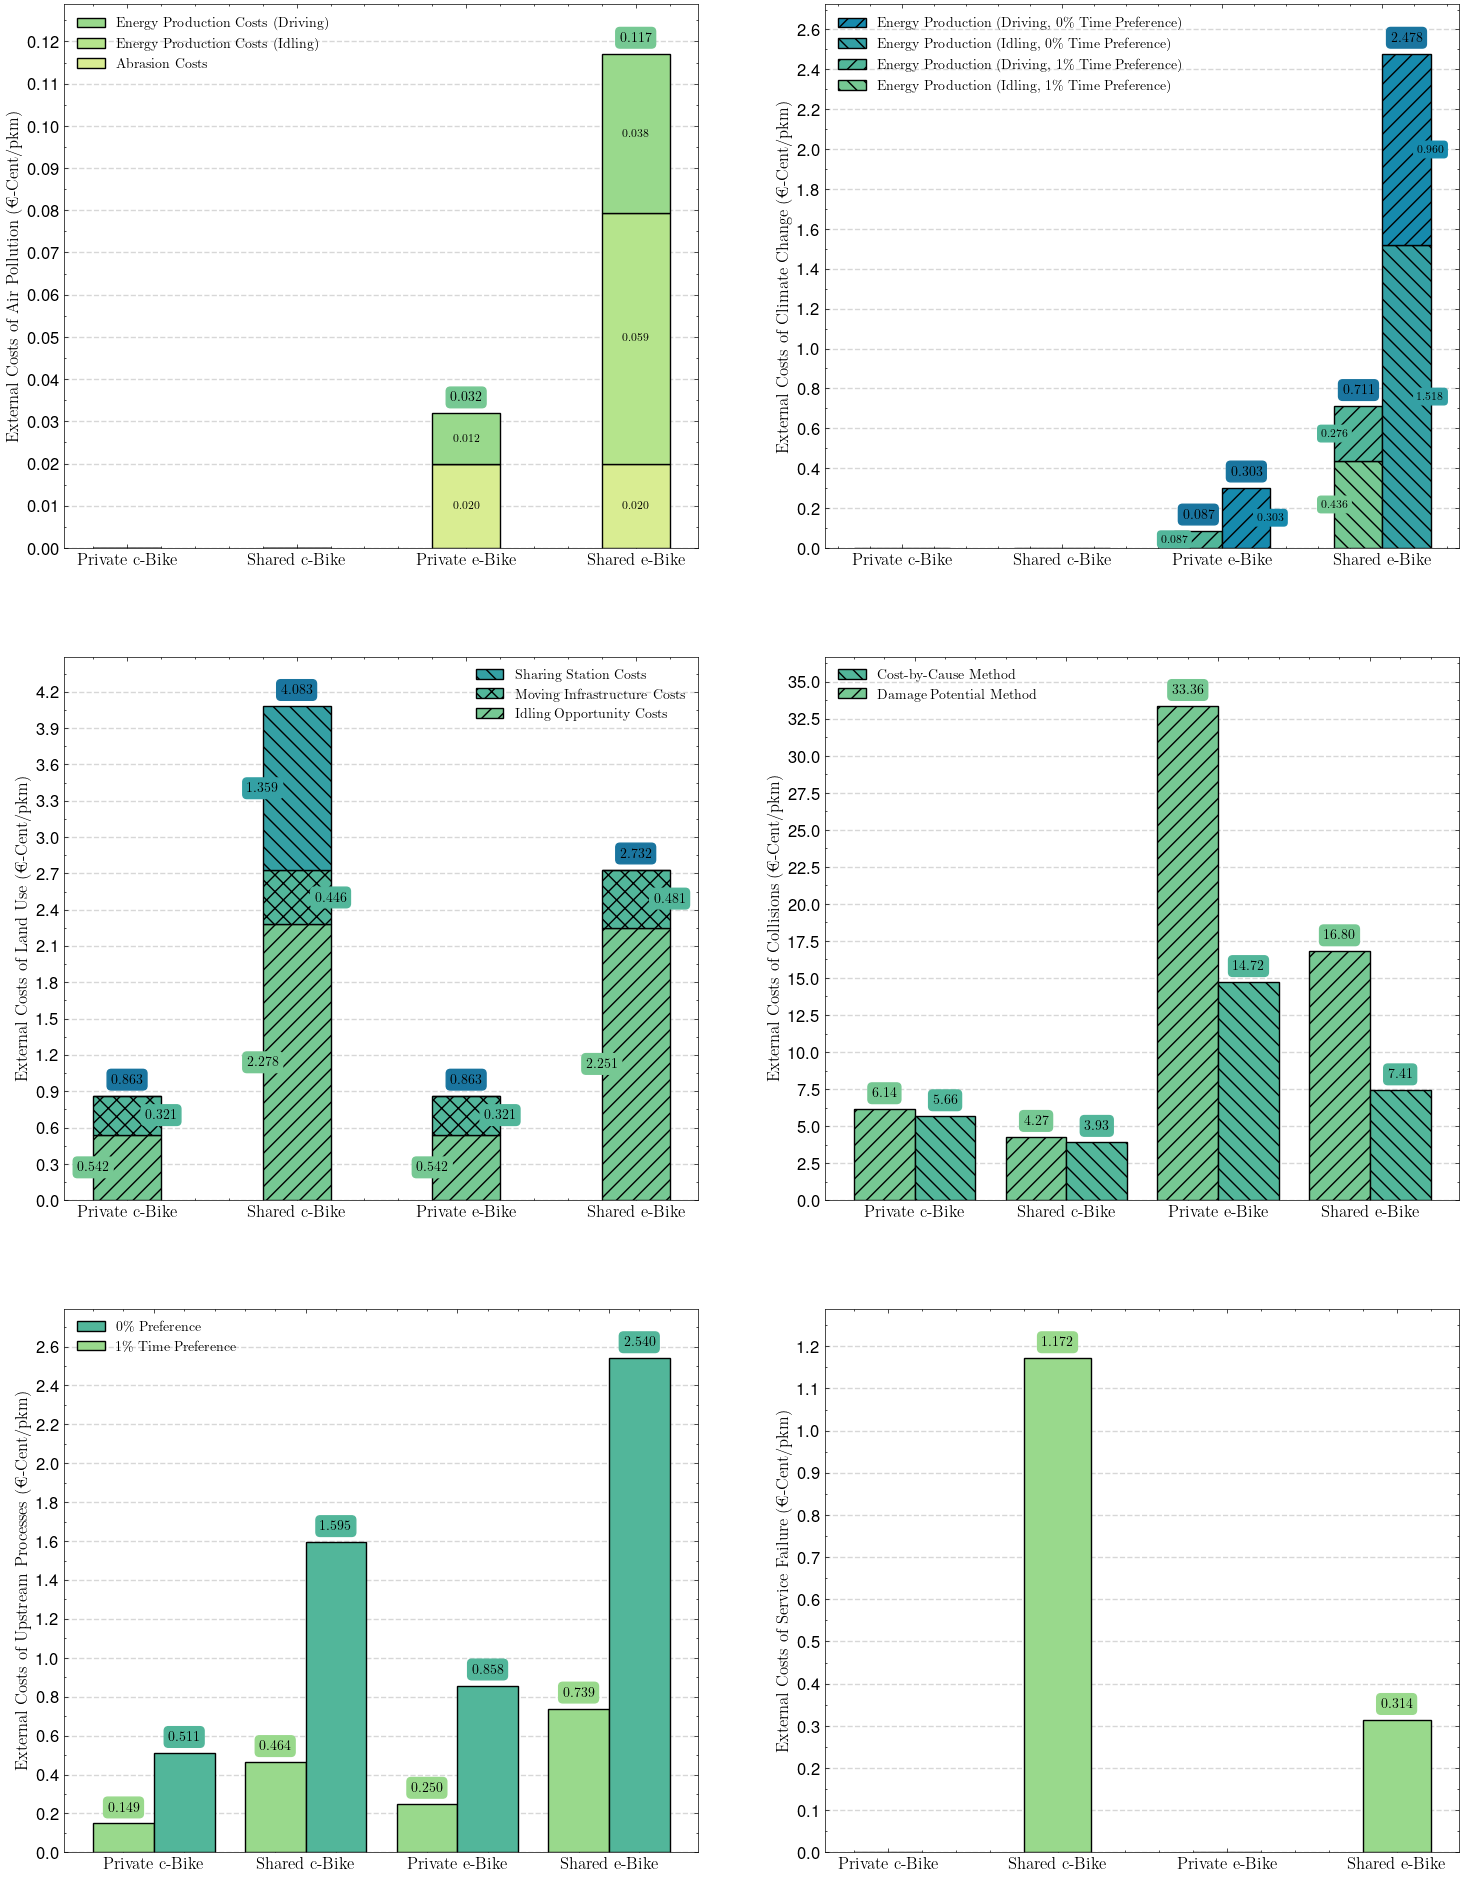

<Figure size 330x250 with 0 Axes>

In [14]:
generate_combined_external_costs_plot(
    external_costs_results_1_time_pref_private_bicycle, 
    external_costs_results_0_time_pref_private_bicycle, 
    external_costs_results_causer_private_bicycle, 
    external_costs_results_1_time_pref_shared_bicycle, 
    external_costs_results_0_time_pref_shared_bicycle, 
    external_costs_results_causer_shared_bicycle, 
    external_costs_results_1_time_pref_private_pedelec, 
    external_costs_results_0_time_pref_private_pedelec, 
    external_costs_results_causer_private_pedelec, 
    external_costs_results_1_time_pref_shared_pedelec, 
    external_costs_results_0_time_pref_shared_pedelec, 
    external_costs_results_causer_shared_pedelec
)

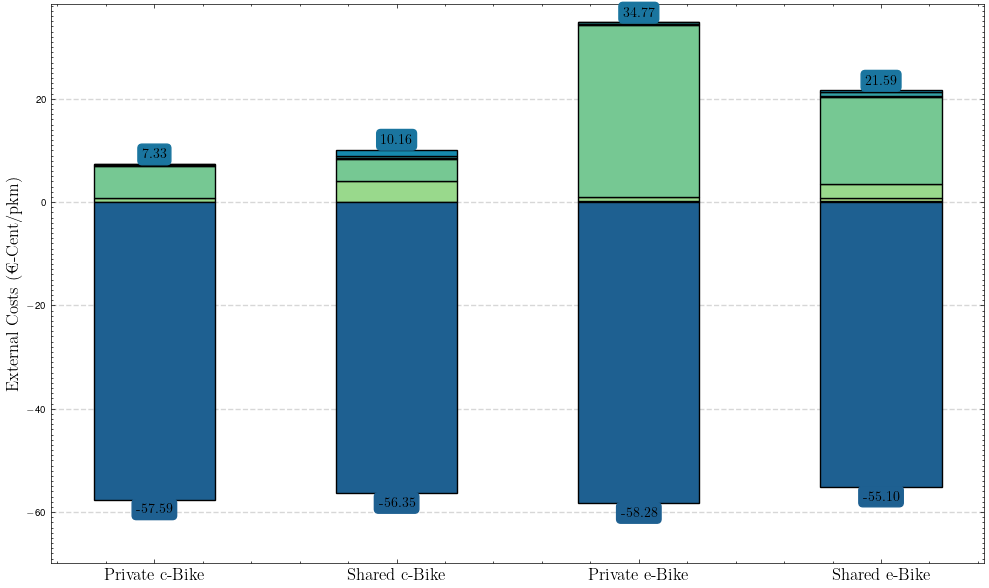

In [15]:
# Bar plot of total external costs with health benefits in €-ct/vkm for all modes
generate_external_costs_with_health_benefits_plot(external_costs_results_1_time_pref_private_bicycle,  
                       external_costs_results_1_time_pref_shared_bicycle,  
                       external_costs_results_1_time_pref_private_pedelec, 
                       external_costs_results_1_time_pref_shared_pedelec)